https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [1]:
# ROC curve and Area Under Curve (AUC)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import pyplot

In [2]:
# Generate two class dataset
X, y = make_classification(n_samples=2000, n_classes=2, random_state=1)

In [3]:
# Split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [4]:
# Generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

In [5]:
# Fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [6]:
# Predict probabilities
lr_probs = model.predict_proba(testX)

In [7]:
# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [8]:
# Calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

In [9]:
# Calculate scores
print(f"No Skill: ROC AUC={ns_auc}")
print(f"Logistic: ROC AUC={lr_auc}")

No Skill: ROC AUC=0.5
Logistic: ROC AUC=0.9656073539593163


In [10]:
# Calculate ROC curves
# False positive rate, true positive rate
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

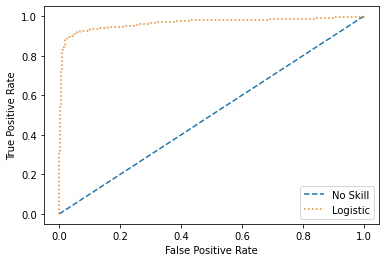

In [11]:
# Plot the ROC curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, linestyle='dotted', label='Logistic')
# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# Show the legend
pyplot.legend()
# Show the plot
pyplot.show()